In [2]:
import os 
import pandas as pd
import pydicom as dicom
import numpy as np
from model_SR_center_line import *
import matplotlib.pylab as plt

    

In [3]:
#------------------------------------------------
dirr = r'C:\Users\kmorales\Desktop\2DO PhD\Strasbourg\DATA_SFA006'
path  = r'C:\Users\kmorales\Desktop\2DO PhD\Strasbourg'
path_sr = r'C:\Users\kmorales\Desktop\2DO PhD\Strasbourg\DATA_SFA006\super_resolution\LapSRN_x8.pb'

file = 'datos_info.xlsx'
sheet = 'SR_SFA0006_v1'
datos = pd.read_excel(os.path.join(path, file), sheet_name= sheet)
#datos.head()
error = 4
#------------------------------------------------

ct_im = read_center_line(datos, error, dirr)
sr_images = SR_CT(path_sr, ct_im)


1588 1361


In [ ]:
#------------------------------------------------------------------
# TEST SUPER RESOLUTION IMAGES
#------------------------------------------------------------------
import torch
from torchsummary import summary
import torch.nn as nn
import torch.optim as optim
import os, cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
#---------------------
from test import test 
from unet_3block_conv import *
from outils_prepro import * 
from data_loader_seg import *
from model_prob_unet_init import *
from create_images_3_classes import *
from training import *
from loss import *
#---------------------
# Data
batch_size_test  = 1
image_shape = (64, 64) 
#---------------------- 
data_test = Segmentation_CT_Dataset(sr_images,image_shape)
dataloaders_test = torch.utils.data.DataLoader(data_test, batch_size_test)
#----------------------
# Model 
input_channels = 3
num_classes = 3
# learning_rate = 5e-4  
# epochs = 101
folder_name = 'model_unet_1'
#----------------------
# TEST
epoch_init = '100.torch'
#----------------------
beta = 20
filters = 8
z_dim = 10
#----------------------
if filters == 8:
    featureDim = 16384
if filters ==4:
    featureDim = 8192


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
modelPath = os.path.join(r'C:\Users\kmorales\Desktop\2DO PhD\Strasbourg\Hugo_seg', folder_name)
#net = Probabilistic_UNET(input_channels, num_classes, filters, z_dim, image_shape, featureDim)
net = UNET(input_channels, num_classes) 
net.to(device)
net.load_state_dict(torch.load(os.path.join(modelPath , epoch_init))) # Load trained model
net.eval()
#optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate, weight_decay=0)

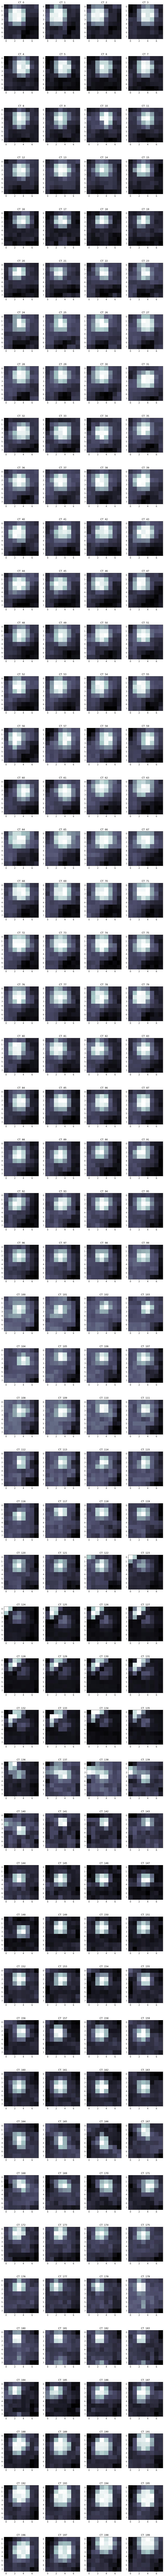

In [21]:

# Visualization of random images 
# N = 120
# index_rd = np.random.randint(0, len(ct_im)-1, N)
# Visualization of random images 

j = 50 # j*4 images in total 
index_rd = range(4*j)

fig = plt.figure(figsize=(15,5*j ))
for h in range(j):
    ax  =  plt.subplot(j, 4, 4*h+1)
    ax.imshow(ct_im[index_rd[4*h]], cmap = 'bone')
    ax.set_title("CT  "+str(index_rd[4*h]))
    
    ax  =  plt.subplot(j, 4, 4*h+2)
    ax.imshow(ct_im[index_rd[4*h+1]], cmap = 'bone')
    ax.set_title("CT  "+str(index_rd[4*h+1]))
      
    ax  =  plt.subplot(j, 4, 4*h+3)
    ax.imshow(ct_im[index_rd[4*h+2]], cmap = 'bone')
    ax.set_title("CT  "+str(index_rd[4*h+2]))
    
    ax  =  plt.subplot(j, 4, 4*h+4)
    ax.imshow(ct_im[index_rd[4*h+3]], cmap = 'bone')
    ax.set_title("CT  "+str(index_rd[4*h+3]))  
    


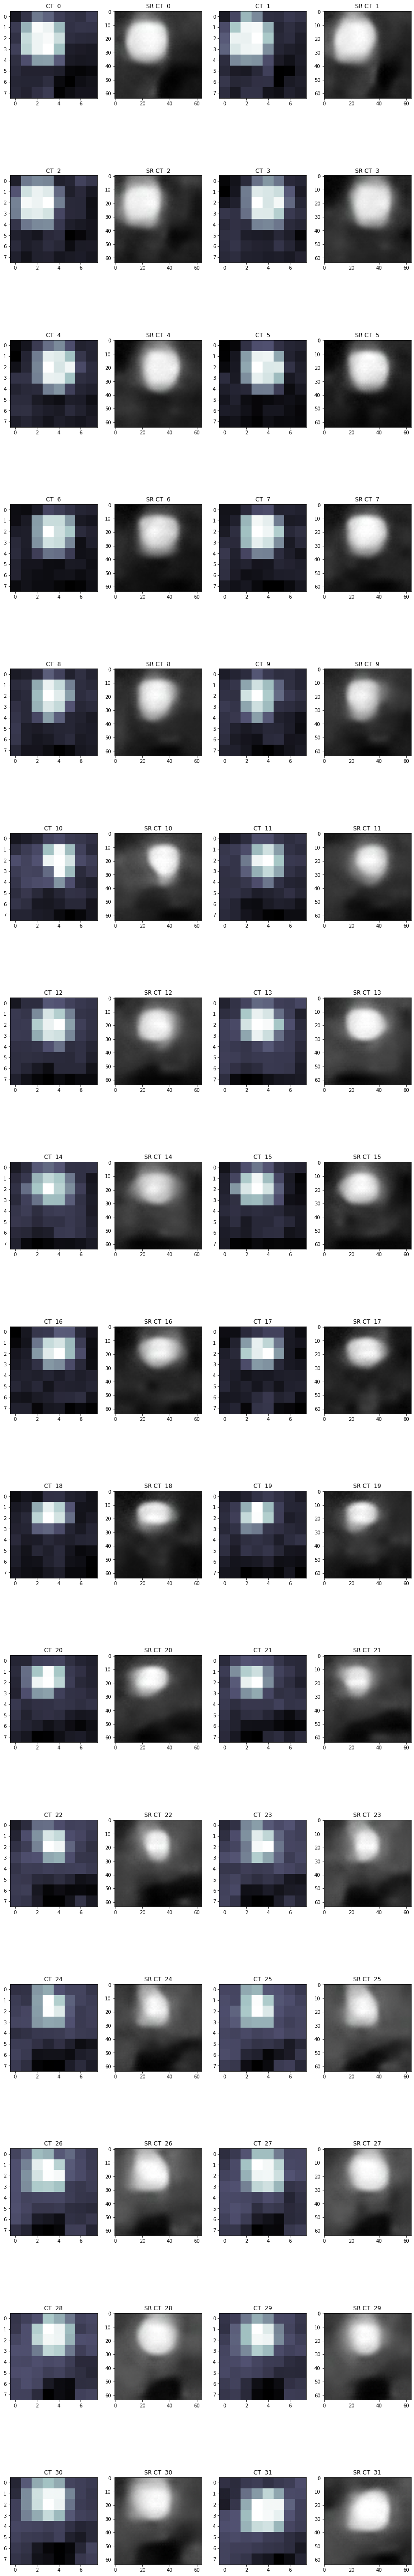

In [81]:
# Visualization of random images 
fig = plt.figure(figsize=(15,100 ))
j = 16
k = 0
h = 0
for i in range(k,k+j):
    ax  =  plt.subplot(j, 4, 4*h+1)
    ax.imshow(ct_im[2*i], cmap = 'bone')
    ax.set_title("CT  "+str(2*i))
    
    ax  =  plt.subplot(j, 4, 4*h+2)
    ax.imshow(sr_images[2*i], cmap = 'bone')
    ax.set_title("SR CT  "+str(2*i))
      
    ax  =  plt.subplot(j, 4, 4*h+3)
    ax.imshow(ct_im[2*i+1], cmap = 'bone')
    ax.set_title("CT  "+str(2*i+1))
    
    ax  =  plt.subplot(j, 4, 4*h+4)
    ax.imshow(sr_images[2*i+1], cmap = 'bone')
    ax.set_title("SR CT  "+str(2*i+1))   
    h +=1
    

UNET(
  (conv1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(32, 32, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3))
    (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  )
  (conv3): Sequential(
    (0): Conv2d(64, 128, kerne

In [84]:
from matplotlib.pyplot import figure




In [85]:
seg_sr_images = test_SR_UNET(net, dataloaders_test, device)

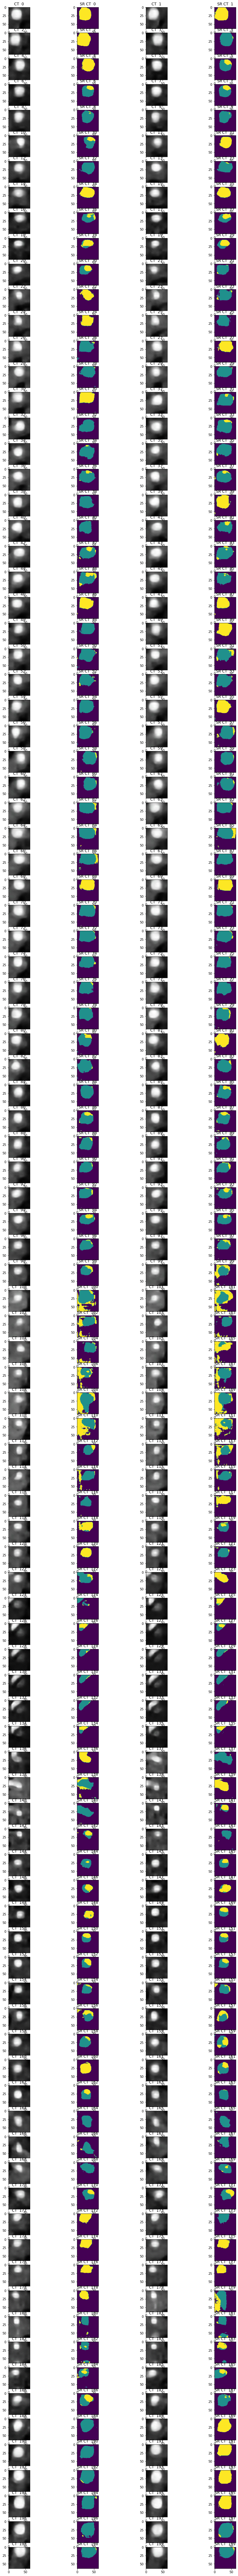

In [86]:
# Visualization of random images 

fig = plt.figure(figsize=(15,150 ))
j = 100
k = 0
h = 0
for i in range(k,k+j):
    ax  =  plt.subplot(j, 4, 4*h+1)
    ax.imshow(sr_images[2*i])
    ax.set_title("CT  "+str(2*i))
    
    ax  =  plt.subplot(j, 4, 4*h+2)
    ax.imshow(seg_sr_images[2*i])
    ax.set_title("SR CT  "+str(2*i))
      
    ax  =  plt.subplot(j, 4, 4*h+3)
    ax.imshow(sr_images[2*i+1])
    ax.set_title("CT  "+str(2*i+1))
    
    ax  =  plt.subplot(j, 4, 4*h+4)
    ax.imshow(seg_sr_images[2*i+1])
    ax.set_title("SR CT  "+str(2*i+1))   
    h +=1
    